

```
## IMPORT ALL **LIBRARIES** **bold text**

```



In [1]:
import pandas as pd
import random
import numpy as np
import re
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
from io import StringIO

In [2]:
df_2016=pd.read_excel("/content/kenya-accidents-database.xlsx")
df_2017=pd.read_excel("/content/2017.xlsx")
df=df_2016.append(df_2017,ignore_index=True)
df.head(2)

,TIME 24 HOURS,BASE/SUB BASE,COUNTY,ROAD,PLACE,BRIEF ACCIDENT DETAILS,GENDER,AGE,CAUSE CODE,VICTIM,NO.,Date DD/MM/YYYY,Unnamed: 12,MV INVOLVED,NAME OF VICTIM,Unnamed: 14
0,630.0,KITUI,MAKUENI,KITUI-ITHOKWE,KITUI SCHOOL,HEAD ON COLLISION,M,26,7.0,M/CYCLIST,1.0,2016-06-25,so MM/DD/YYYY is the solution :),NaN,NaN,NaT
1,830.0,VOI,TAITA TAVETA,MOMBASA-NAIROBI,IKANGA,HEAD ON COLLISION,M,28,25.0,M/CYCLIST,1.0,2016-06-25,NaN,NaN,NaN,NaT


In [3]:
df.dropna()
df = df.drop_duplicates()
df.drop
df.head(2)

,TIME 24 HOURS,BASE/SUB BASE,COUNTY,ROAD,PLACE,BRIEF ACCIDENT DETAILS,GENDER,AGE,CAUSE CODE,VICTIM,NO.,Date DD/MM/YYYY,Unnamed: 12,MV INVOLVED,NAME OF VICTIM,Unnamed: 14
0,630.0,KITUI,MAKUENI,KITUI-ITHOKWE,KITUI SCHOOL,HEAD ON COLLISION,M,26,7.0,M/CYCLIST,1.0,2016-06-25,so MM/DD/YYYY is the solution :),NaN,NaN,NaT
1,830.0,VOI,TAITA TAVETA,MOMBASA-NAIROBI,IKANGA,HEAD ON COLLISION,M,28,25.0,M/CYCLIST,1.0,2016-06-25,NaN,NaN,NaN,NaT


In [8]:

df['AGE'].unique()

array([26, 28, 65, 15, 17, 38, 36, 35, 7, 33, 29, 37, 19, 30, 13, 32, 1.5,
       57, 40, 27, 55, 78, 60, 21, 9, 14, 10, 12, 54, 47, 23, 70, 18, 41,
       48, 73, 3, 20, 49, 11, 5, 25, 90, 43, 24, 44, 50, 22, 71, 6, 39,
       42, 16, 31, 8, 4, 52, 63, 45, 80, 76, 58, 34, 59, 69, nan, 51, 2,
       46, 77, 53, 61, 56, 62], dtype=object)

**Drop rows where age is in alpha**

In [9]:
  df=df[df['AGE'].apply(lambda x: type(x) in [int, np.int64, float, np.float64])]

In [13]:
df.shape
df['AGE'].dropna()
df['AGE'].unique()

array([26, 28, 65, 15, 17, 38, 36, 35, 7, 33, 29, 37, 19, 30, 13, 32, 1.5,
       57, 40, 27, 55, 78, 60, 21, 9, 14, 10, 12, 54, 47, 23, 70, 18, 41,
       48, 73, 3, 20, 49, 11, 5, 25, 90, 43, 24, 44, 50, 22, 71, 6, 39,
       42, 16, 31, 8, 4, 52, 63, 45, 80, 76, 58, 34, 59, 69, nan, 51, 2,
       46, 77, 53, 61, 56, 62], dtype=object)

**AGE INVOLVED IN ACCIDENTS**

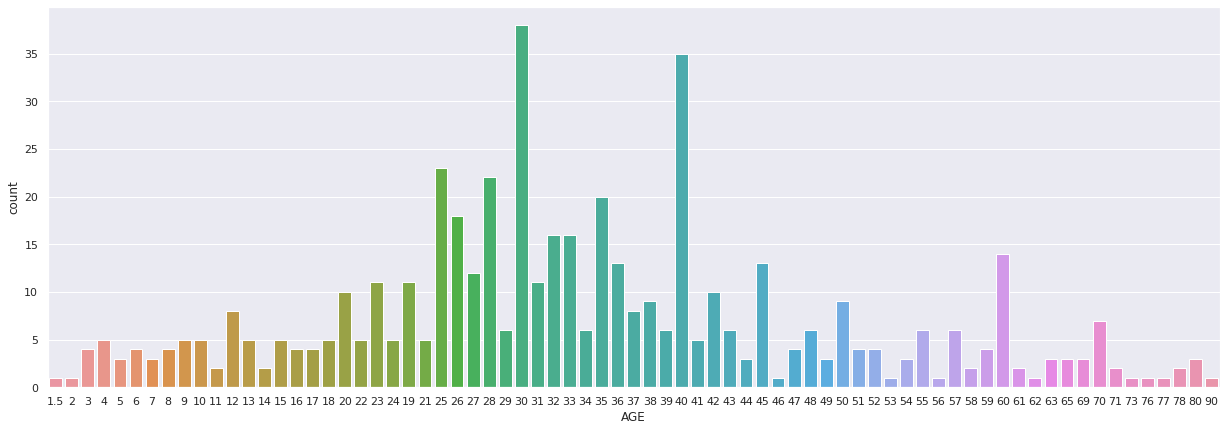

In [14]:
plt.rcParams['figure.figsize'] = (21,7)

sns.set_theme(style="darkgrid")
titanic = sns.load_dataset("titanic")
sns.countplot(x=df['AGE'], data=titanic)

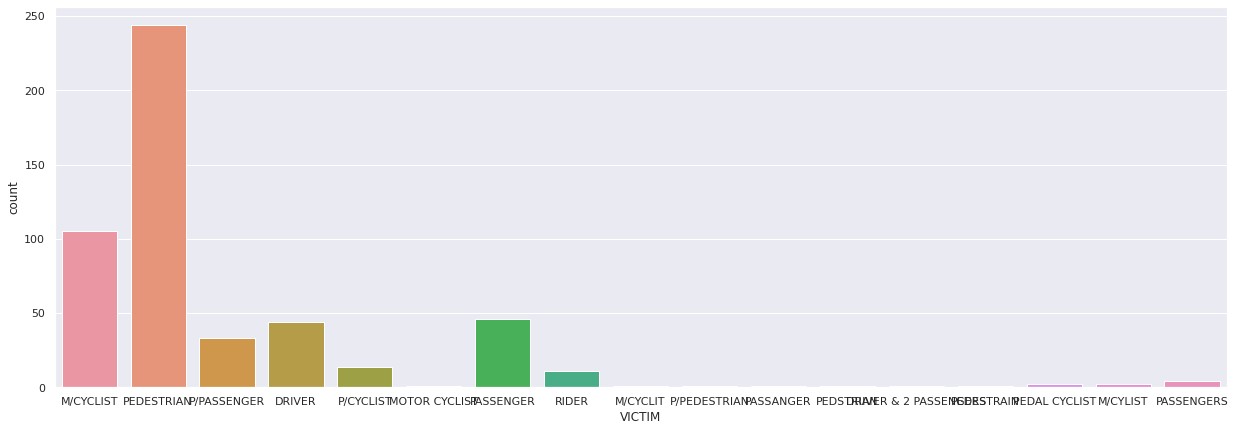

In [15]:
# order=df.sort_values('Growth').State

sns.set_theme(style="darkgrid")
titanic = sns.load_dataset("titanic")
sns.countplot(x=df['VICTIM'],data=titanic)

In [35]:
mean = df[['AGE']].mean(axis=1)
mean.describe()
#df['AGE']=df.AGE.apply(lambda x: np.where(x.isdigit(),x,'0'))


count    511.000000
mean      34.118395
std       15.878218
min        1.500000
25%       25.000000
50%       32.000000
75%       42.000000
max       90.000000
dtype: float64

In [36]:
def num_toTime(mytime):
  time=pd.to_datetime(mytime, format='%H%M')
  return time

In [37]:
df =df[df['AGE'].apply(lambda x: type(x) in [int, np.int64, float, np.float64])]

from matplotlib.pyplot import figure

import plotly.graph_objects as go

from plotly.graph_objs import *

trace = go.Scatter(x=df["Date DD/MM/YYYY"],
                   y=df['TIME 24 HOURS'], 
                    
                   )
# trace = go.Scatter(x=df['index'], 
#                   y=df['Survilance'])
fig = go.Figure()

# plot_url = py.plot(fig, filename='transparent-background')
fig.add_trace(trace)
fig.update_layout(title='Relationship between LSTAT and med_value')
fig.update_xaxes(title="LSTAT")
fig.update_yaxes(title="med_value")

fig.show()


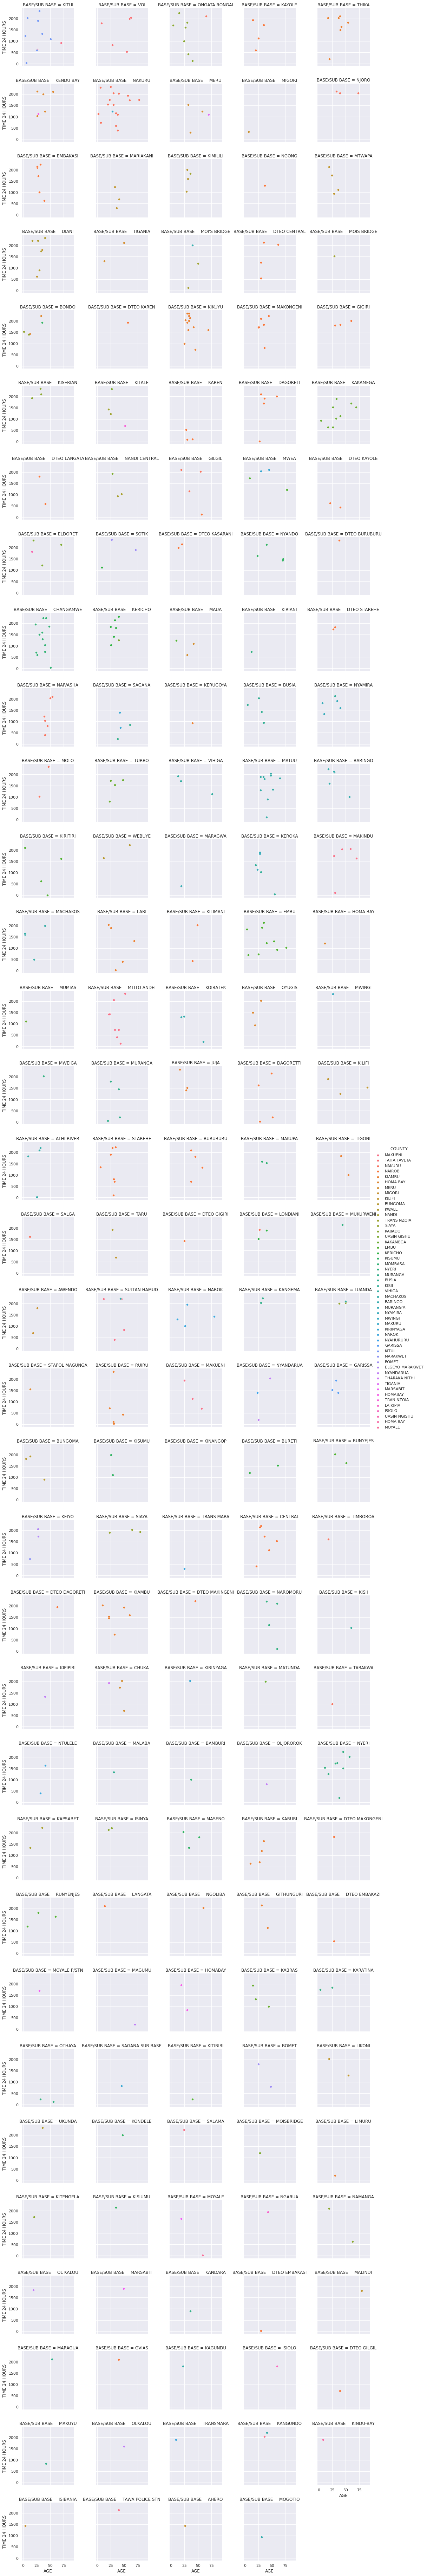

In [21]:
# BASE/SUB BASE	COUNTY	ROAD
grid = sns.FacetGrid(df, col = "BASE/SUB BASE", hue = "COUNTY", col_wrap=5)
grid.map(sns.scatterplot, "AGE", "TIME 24 HOURS")

grid.add_legend()

plt.show()

In [38]:
import plotly.graph_objects as go

from plotly.graph_objs import *

trace = go.Scatter(x=df["Date DD/MM/YYYY"],
                   y=df['TIME 24 HOURS'], 
                    
                   )
# trace = go.Scatter(x=df['index'], 
#                   y=df['Survilance'])
fig = go.Figure()

# plot_url = py.plot(fig, filename='transparent-background')
fig.add_trace(trace)
fig.update_layout(title='date time')
fig.update_xaxes(title="date")
fig.update_yaxes(title="time")

fig.show()


In [39]:
import numpy as np
df=df[df['AGE'].apply(lambda x: isinstance(x, (int, np.int64)))]
df.head(2)

,TIME 24 HOURS,BASE/SUB BASE,COUNTY,ROAD,PLACE,BRIEF ACCIDENT DETAILS,GENDER,AGE,CAUSE CODE,VICTIM,NO.,Date DD/MM/YYYY,Unnamed: 12,MV INVOLVED,NAME OF VICTIM,Unnamed: 14
0,630.0,KITUI,MAKUENI,KITUI-ITHOKWE,KITUI SCHOOL,HEAD ON COLLISION,M,26,7.0,M/CYCLIST,1.0,2016-06-25,so MM/DD/YYYY is the solution :),NaN,NaN,NaT
1,830.0,VOI,TAITA TAVETA,MOMBASA-NAIROBI,IKANGA,HEAD ON COLLISION,M,28,25.0,M/CYCLIST,1.0,2016-06-25,NaN,NaN,NaN,NaT


In [ ]:
df_ras=pd.read_excel("/content/ras.xlsx")
df_ras.dropna()
df_ras

# Simulation

In [40]:
import sklearn
from sklearn.model_selection import train_test_split
age = df['AGE'].values
age=np.reshape(age, (-1, 1))
gender = df['GENDER'].values
X_train,x_test, Y_train, y_test = train_test_split(age, gender, test_size=0.2, random_state=1000)

In [ ]:
x_train= to_categorical(X_train,2)
y_train= to_catergorical(Y_train,2)


**Naive Bayes**

In [45]:
from sklearn.naive_bayes import MultinomialNB  # Naive Bayes Classifier
model_naive = MultinomialNB().fit(X_train, Y_train) 
predicted_naive = model_naive.predict(x_test)


In [ ]:
age.shape
gender.shape

(510,)

In [46]:


from sklearn.metrics import accuracy_score

score_naive = accuracy_score(predicted_naive, y_test)

print("Accuracy with Naive-bayes: ",(score_naive)*100,"%")



Accuracy with Naive-bayes:  85.29411764705883 %


In [47]:
test=predicted_naive = model_naive.predict([[30]])
print(test)

['M']


**TENSORFLOW NEURAL NETWORK**

In [101]:
import tensorflow as tf
from tensorflow.keras.preprocessing.text import one_hot,Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Embedding, Input, LSTM, Conv1D, MaxPool1D, Bidirectional, Dropout
from tensorflow.keras.models import Model
from tensorflow.keras.utils import to_categorical

In [103]:
y=df['GENDER']
X=df['AGE'].values
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.5)

In [104]:
X_train.shape

(255,)

In [105]:
X_test.shape

(255,)

#Tokenize the data


In [106]:
# length_of_datset = len(list(set(df['AGE'])))

# length_of_datset

72

In [108]:
# tokenizer = Tokenizer(num_words = length_of_datset)
# tokenizer.fit_on_texts(X_train)

# # Training data
# train_sequences = tokenizer.texts_to_sequences(X_train)

# # Testing data
# test_sequences = tokenizer.texts_to_sequences(X_test)

Padding


In [110]:
# padded_train = pad_sequences(X_train, maxlen = 0, padding = 'post', truncating = 'post')
# padded_test = pad_sequences(y_train, maxlen = 0, truncating = 'post')

In [90]:
for i, doc in enumerate(padded_train[:3]):
     print("The padded encoding for document:", i+1," is:", doc)

The padded encoding for document: 1  is: []
The padded encoding for document: 2  is: []
The padded encoding for document: 3  is: []


In [111]:
y_train

1003    M
754     M
830     M
645     F
682     M
       ..
284     F
351     M
363     M
20      M
974     M
Name: GENDER, Length: 255, dtype: object

In [114]:
# Convert the data to categorical 2D representation
# y_train_cat = y_train.reshape(1,-1)
# y_test_cat =y_test.reshape(1,-1)

In [116]:
y_train_cat = np.asarray(y_train_cat).astype(np.float32)
y_train_cat.shape

(1, 255)

In [117]:
y_test_cat = np.asarray(y_test_cat).astype(np.float32)
y_test_cat.shape

(1, 255)

In [118]:
model = Sequential()

# embedding layer
model.add(Embedding(length_of_datset, output_dim = 512))

# Bi-Directional RNN and LSTM
model.add(LSTM(256))

# Dense layers
model.add(Dense(128, activation = 'relu'))
model.add(Dropout(0.3))
model.add(Dense(2,activation = 'softmax'))
model.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics = ['acc'])
model.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_4 (Embedding)      (None, None, 512)         36864     
_________________________________________________________________
lstm_4 (LSTM)                (None, 256)               787456    
_________________________________________________________________
dense_8 (Dense)              (None, 128)               32896     
_________________________________________________________________
dropout_4 (Dropout)          (None, 128)               0         
_________________________________________________________________
dense_9 (Dense)              (None, 2)                 258       
Total params: 857,474
Trainable params: 857,474
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model.fit(padded_train, y_train_cat, batch_size = 32, validation_split = 0.2, epochs = 2)

In [ ]:
pred = model.predict(padded_test)
prediction = []
for i in pred:
  prediction.append(np.argmax(i))
original = []
for i in y_test_cat:
  original.append(np.argmax(i))

ACCURACY

In [ ]:
from sklearn.metrics import accuracy_score

accuracy = accuracy_score(original, prediction)
accuracy

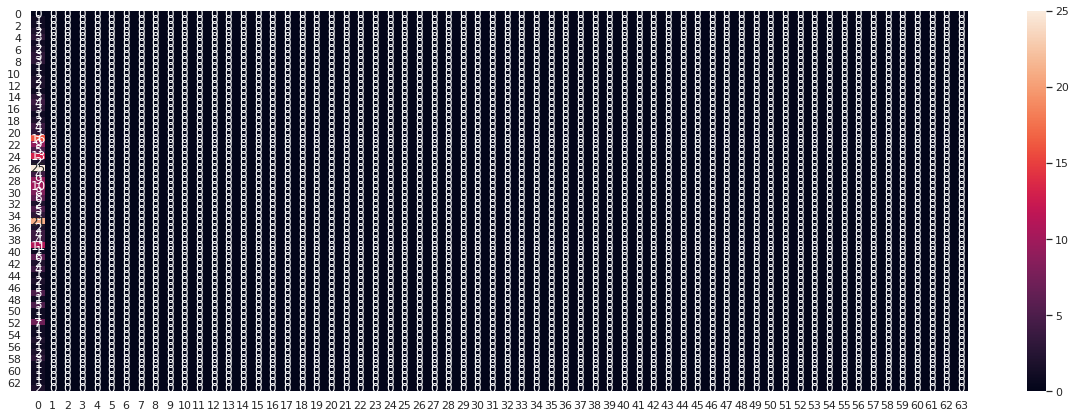

In [ ]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(original, prediction)
sns.heatmap(cm, annot = True)